## <div align="center"> TUGAS LAB IF540 MACHINE LEARNING </div>
### <div align="center"> WEEK [08] : [Pembelajaran Mendalam] </div>

#### <div align="center"> Semester Ganjil 2022/2023 </div>

In [21]:
import datetime
import uuid    

# Fill in your name and NIM
myName = "Steven Indriano"
myNIM = "57217"

myDate = datetime.datetime.now()
myDevice = str(uuid.uuid1())

# Header
print("Name: \t\t{}".format(myName))
print("NIM: \t\t{}".format(myNIM))
print("Start: \t\t{}".format(myDate))
print("Device ID: \t{}".format(myDevice))

Name: 		Steven Indriano
NIM: 		57217
Start: 		2023-11-01 17:51:23.026670
Device ID: 	98e6594c-78a4-11ee-bc04-f057a69a9c86



---

### Dataset yang dipakai:

1. [Vehicle Type Recognition] – sumber : [https://www.kaggle.com/datasets/kaggleashwin/vehicle-type-recognition]
2. [fruits-recognition] – sumber : [https://www.kaggle.com/datasets/badgujjarajay/fruits-data/data]

### Hasil kerja

In [8]:
# Your codes are here (replace the following codes)
print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {tensorflow.keras.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")

Tensor Flow Version: 2.10.0
Keras Version: 2.10.0

Python 3.10.13 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:15:57) [MSC v.1916 64 bit (AMD64)]
Pandas 2.1.2
Scikit-Learn 1.3.2


In [1]:
import sys

import tensorflow.keras
import pandas as pd
import sklearn as sk
import tensorflow as tf

In [2]:
import tensorflow.keras
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("Shape of x_train: {}".format(x_train.shape))
print("Shape of y_train: {}".format(y_train.shape))
print()
print("Shape of x_test: {}".format(x_test.shape))
print("Shape of y_test: {}".format(y_test.shape))

Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)

Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


In [3]:
from IPython.display import display
import pandas as pd

#Display as text
pd.set_option('display.max_columns', 15)
pd.set_option('display.max_rows', 5)

print("Shape for dataset: {}".format(x_train.shape))
print("Labels: {}".format(y_train))

#single MNIST digit
single = x_train[0]
print("Shape for single: {}".format(single.shape))

pd.DataFrame(single.reshape(28,28))

Shape for dataset: (60000, 28, 28)
Labels: [5 0 4 ... 5 6 8]
Shape for single: (28, 28)


,0,1,2,3,4,5,6,...,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0
27,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0


Image (#105): Which is digit '1'


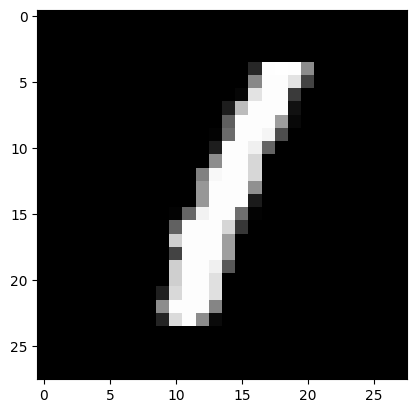

In [4]:
# Display as image
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
digit = 105 #Change to choose new digit
a = x_train[digit]
plt.imshow(a, cmap='gray', interpolation='nearest')
print("Image (#{}): Which is digit '{}'".format(digit, y_train[digit]))

<Figure size 640x480 with 0 Axes>

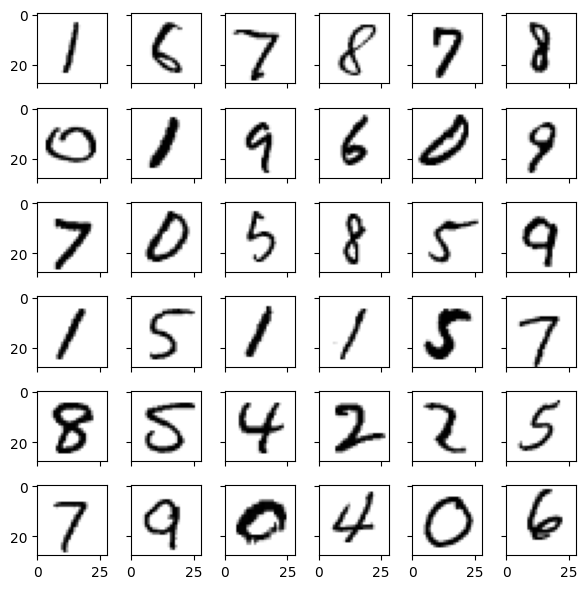

In [5]:
import random

# display random images in dataset
ROWS = 6
random_indices = random.sample(range(x_train.shape[0]), ROWS * ROWS)

sample_images = x_train[random_indices, :]

plt.clf()

fig, axes = plt.subplots(ROWS, ROWS, figsize=(ROWS, ROWS), sharex=True, sharey=True)

for i in range(ROWS * ROWS):
    subplot_row = i // ROWS
    subplot_col = i % ROWS
    ax = axes[subplot_row, subplot_col]

    plottable_image = np.reshape(sample_images[i, :], (28, 28))
    ax.imshow(plottable_image, cmap="gray_r")

    ax.set_xbound([0, 28])

plt.tight_layout()
plt.show()

In [6]:
from tensorflow import keras
from keras import backend as K
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

batch_size = 128
num_classes = 10
epochs = 12

(x_train, y_train), (x_test, y_test) = mnist.load_data()

img_rows, img_cols = 28, 28
if K.image_data_format() == "channels_first":
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
x_train /= 255
x_test /= 255

print("x_train shape:", x_train.shape)
print("Training samples: {}".format(x_train.shape[0]))
print("Test samples: {}".format(x_test.shape[0]))


y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

x_train shape: (60000, 28, 28, 1)
Training samples: 60000
Test samples: 10000


In [7]:
import tensorflow as tf
import time


def hms_string(sec_elapsed):
    h = int(sec_elapsed // 3600)
    m = int((sec_elapsed % 3600) // 60)
    s = sec_elapsed % 60
    return "{:02d}:{:02d}:{:.2f}".format(h, m, s)


start_time = time.time()

model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=2,
    validation_data=(x_test, y_test),
)
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss: {}".format(score[0]))
print("Test accuracy: {}".format(score[1]))

elapsed_time = time.time() - start_time
print("Elapsed time: {}".format(hms_string(elapsed_time)))

Epoch 1/12
469/469 [==============================] - 83s 177ms/step - loss: 0.2455 - accuracy: 0.9235 - val_loss: 0.0505 - val_accuracy: 0.9836
Epoch 2/12
469/469 [==============================] - 80s 171ms/step - loss: 0.0865 - accuracy: 0.9737 - val_loss: 0.0363 - val_accuracy: 0.9880
Epoch 3/12
469/469 [==============================] - 80s 171ms/step - loss: 0.0659 - accuracy: 0.9803 - val_loss: 0.0342 - val_accuracy: 0.9894
Epoch 4/12
469/469 [==============================] - 82s 174ms/step - loss: 0.0531 - accuracy: 0.9835 - val_loss: 0.0296 - val_accuracy: 0.9896
Epoch 5/12
469/469 [==============================] - 81s 173ms/step - loss: 0.0473 - accuracy: 0.9848 - val_loss: 0.0278 - val_accuracy: 0.9917
Epoch 6/12
469/469 [==============================] - 83s 177ms/step - loss: 0.0389 - accuracy: 0.9884 - val_loss: 0.0325 - val_accuracy: 0.9886
Epoch 7/12
469/469 [==============================] - 82s 174ms/step - loss: 0.0357 - accuracy: 0.9883 - val_loss: 0.0263 - val_ac

NameError: name 'hms_string' is not defined

In [9]:
# Set the desired Tensorflow output level
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}'.format(score[0]))
print('Test accuracy: {}'.format(score[1]))

Test loss: 0.024400772526860237
Test accuracy: 0.9926000237464905


In [10]:
from sklearn import metrics

small_x = x_test[1:100]
small_y = y_test[1:100]
small_y2 = np.argmax(small_y, axis=1)
pred = model.predict(small_x)
pred = np.argmax(pred, axis=1)
score = metrics.accuracy_score(small_y2, pred)
print('Accuracy: {}'.format(score))

4/4 [==============================] - 0s 43ms/step
Accuracy: 0.98989898989899


In [12]:
import tensorflow.keras
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print("Shape of x_train: {}".format(x_train.shape))
print("Shape of y_train: {}".format(y_train.shape))
print()
print("Shape of x_test: {}".format(x_test.shape))
print("Shape of y_test: {}".format(y_test.shape))

4422102/4422102 [==============================] - 1s 0us/step
Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)

Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


In [13]:
#Display as text
from IPython.display import display
import pandas as pd

print("Shape for dataset: ()".format(x_train.shape))
print("Labels: ()".format(y_train))

# Single MNIST digit
single = x_train[0]
print("Shape for single: {}".format(single.shape))

pd.set_option('display.max_columns', 7)
pd.set_option('display.max_rows', 10)
pd.DataFrame(single.reshape(28,28))

Shape for dataset: ()
Labels: ()
Shape for single: (28, 28)


,0,1,2,...,25,26,27
0,0,0,0,...,0,0,0
1,0,0,0,...,0,0,0
2,0,0,0,...,0,0,0
3,0,0,0,...,1,1,0
4,0,0,0,...,0,0,3
...,...,...,...,...,...,...,...
23,0,0,74,...,216,170,0
24,2,0,0,...,58,0,0
25,0,0,0,...,0,0,0
26,0,0,0,...,0,0,0


Image (#90): WHich is digit '9'


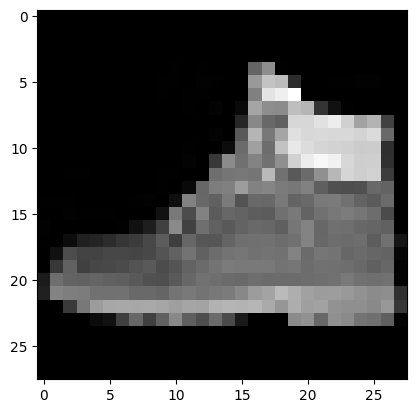

In [14]:
# Display as image
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
digit = 90 #Change to choose new article
a = x_train[digit]
plt.imshow(a, cmap='gray', interpolation='nearest')
print("Image (#{}): WHich is digit '{}'".format(digit,y_train[digit]))

<Figure size 640x480 with 0 Axes>

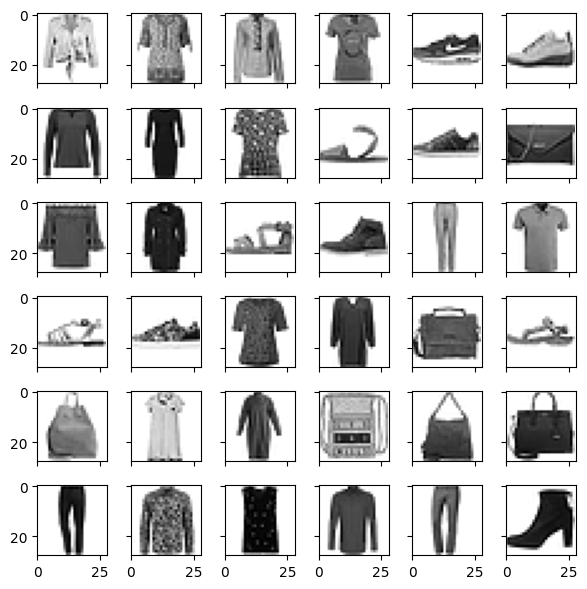

In [16]:
import random

# display random images in dataset
ROWS = 6
random_indices = random.sample(range(x_train.shape[0]), ROWS * ROWS)

sample_images = x_train[random_indices, :]

plt.clf()

fig, axes = plt.subplots(ROWS, ROWS, figsize=(ROWS, ROWS), sharex=True, sharey=True)

for i in range(ROWS * ROWS):
    subplot_row = i // ROWS
    subplot_col = i % ROWS
    ax = axes[subplot_row, subplot_col]

    plottable_image = np.reshape(sample_images[i, :], (28, 28))
    ax.imshow(plottable_image, cmap="gray_r")

    ax.set_xbound([0, 28])

plt.tight_layout()
plt.show()

In [17]:
from tensorflow import keras
from keras import backend as K
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

batch_size = 128
num_classes = 10
epochs = 12

(x_train, y_train), (x_test, y_test) = mnist.load_data()

img_rows, img_cols = 28, 28
if K.image_data_format() == "channels_first":
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
x_train /= 255
x_test /= 255

print("x_train shape:", x_train.shape)
print("Training samples: {}".format(x_train.shape[0]))
print("Test samples: {}".format(x_test.shape[0]))


y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

x_train shape: (60000, 28, 28, 1)
Training samples: 60000
Test samples: 10000


In [19]:
import tensorflow as tf
import time


def hms_string(sec_elapsed):
    h = int(sec_elapsed // 3600)
    m = int((sec_elapsed % 3600) // 60)
    s = sec_elapsed % 60
    return "{:02d}:{:02d}:{:.2f}".format(h, m, s)


start_time = time.time()

model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=2,
    validation_data=(x_test, y_test),
)
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss: {}".format(score[0]))
print("Test accuracy: {}".format(score[1]))

elapsed_time = time.time() - start_time
print("Elapsed time: {}".format(hms_string(elapsed_time)))

Epoch 1/12
469/469 - 78s - loss: 0.2419 - accuracy: 0.9270 - val_loss: 0.0571 - val_accuracy: 0.9811 - 78s/epoch - 166ms/step
Epoch 2/12
469/469 - 77s - loss: 0.0862 - accuracy: 0.9735 - val_loss: 0.0382 - val_accuracy: 0.9867 - 77s/epoch - 164ms/step
Epoch 3/12
469/469 - 79s - loss: 0.0627 - accuracy: 0.9807 - val_loss: 0.0341 - val_accuracy: 0.9892 - 79s/epoch - 168ms/step
Epoch 4/12
469/469 - 78s - loss: 0.0519 - accuracy: 0.9844 - val_loss: 0.0295 - val_accuracy: 0.9900 - 78s/epoch - 165ms/step
Epoch 5/12
469/469 - 78s - loss: 0.0434 - accuracy: 0.9867 - val_loss: 0.0309 - val_accuracy: 0.9904 - 78s/epoch - 167ms/step
Epoch 6/12
469/469 - 79s - loss: 0.0403 - accuracy: 0.9873 - val_loss: 0.0288 - val_accuracy: 0.9907 - 79s/epoch - 168ms/step
Epoch 7/12
469/469 - 77s - loss: 0.0347 - accuracy: 0.9891 - val_loss: 0.0295 - val_accuracy: 0.9906 - 77s/epoch - 164ms/step
Epoch 8/12
469/469 - 81s - loss: 0.0319 - accuracy: 0.9895 - val_loss: 0.0342 - val_accuracy: 0.9896 - 81s/epoch - 174

### Kesimpulan



Berikan simpulan yang dilakukan dari hasil kerja menggunakan algoritma dan 2 dataset yang
dipilih. Simpulan bisa berkisar antara (bisa di modifikasi):

- Deep learning dengan TensorFlow Keras adalah metode yang efektif untuk membangun model pengenalan objek berdasarkan gambar
- Pengumpulan dataset yang baik dan penyiapan data yang benar sangat penting untuk kesuksesan pelatihan model Deep Learning
- Proses pelatihan memerlukan sumber daya komputasi yang cukup besar dan waktu yang signifikan
- Setelah model dilatih, kita dapat menggunakannya untuk mengenali kendaraan atau buah pada gambar yang belum pernah dilihat sebelumnya dengan akurasi yang baik

In [22]:
# Footer
myDate = datetime.datetime.now()
print("I certify that this is my own work.")
print("Signed by:")
print("Name: \t{}".format(myName))
print("NIM: \t{}".format(myNIM))
print("Time-stamp:\t{}".format(myDate))

I certify that this is my own work.
Signed by:
Name: 	Steven Indriano
NIM: 	57217
Time-stamp:	2023-11-01 17:51:28.979536


***

### Save the notebook, then convert the notebook to html (by running the next code).

In [23]:
!jupyter nbconvert --to html "./IF540L_kelas_C_laporan_M08_57217_StevenIndriano.ipynb" --output-dir="./"

[NbConvertApp] Converting notebook ./IF540L_kelas_C_laporan_M08_57217_StevenIndriano.ipynb to html
[NbConvertApp] Writing 994481 bytes to IF540L_kelas_C_laporan_M08_57217_StevenIndriano.html


### Next step:
* convert the generated html file to PDF using the online tool: https://www.sejda.com/html-to-pdf
* choose the following settings:
    * Page size: One long page
    * Page Orientation: auto
    * Use print stylesheet
* Submit your ipython notebook and PDF files

Markdown basics https://markdown-guide.readthedocs.io/en/latest/basics.html#